In [37]:
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt 
import os

In [ ]:
data_path = #"results/redist_flip_alg_data_3100_3020.pkl"
result_path = #"results/redist_flip_alg_result_3100_3020.pkl"

Data is a set of information how the algorithm progressed. It is an array of shape (steps%100, 5) where each row contains:
* `accepted_count` - number of accepted changes in the last 100 steps
* `rejected_count` - number of rejected changes in the last 100 steps
* `pop_max_deriv` - maximum deviation from equal population
* `pop_avg_deriv` - average deviation from equal population
* `compactness` - current compactness score (max is number_of_districts - higher is better)

In [6]:
data = pkl.load(open(data_path, "rb"))
# plt.plot(data[:,2]) # max population deviation
# plt.plot(data[:,3]) # avg population deviation
# plt.plot(data[:,4]) # compactness score

In [32]:
districts = pkl.load(open(result_path, "rb"))

merged_gdf = gpd.read_file("shapefiles/wybory2019_voronoi/wybory2019sejm_voronoi.shx", encoding="utf-8")
merged_gdf['teryt'] = merged_gdf['teryt'].astype(str).str.strip()
merged_gdf['obwod'] = merged_gdf['obwod'].astype(str).str.strip()
mapping = {}
for district, nodes in enumerate(districts):
    for node in nodes:
        for part in node.split("+"):
            teryt_code, obwod_id = part.split("_")
            mapping[(teryt_code, obwod_id)] = district
keys = list(zip(merged_gdf['teryt'], merged_gdf['obwod']))
merged_gdf['district'] = [mapping.get(key, -1) for key in keys]
merged_gdf['district'] = merged_gdf['district'].astype(str)
merged_gdf = merged_gdf.dissolve(by='district', aggfunc='sum')
merged_gdf.reset_index(inplace=True)
merged_gdf.drop(columns=['teryt', 'obwod'], inplace=True)

Plot population bar chart

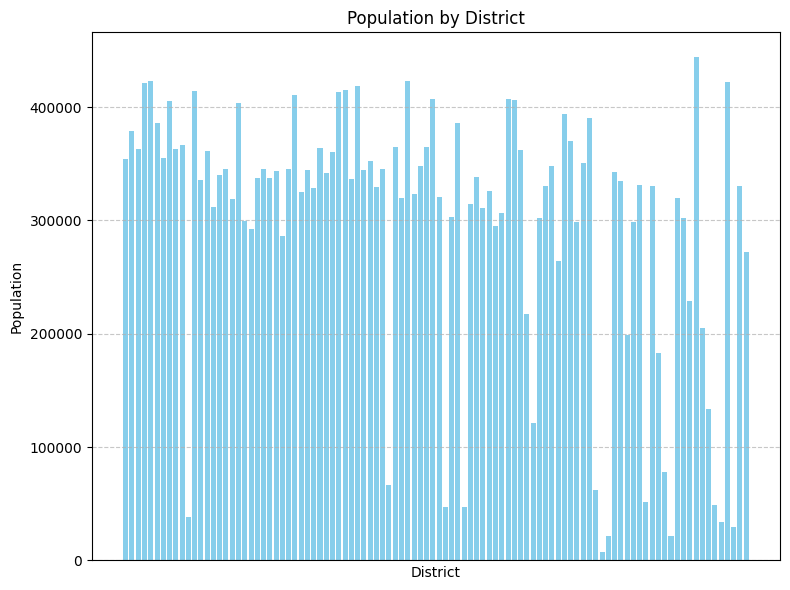

In [33]:
plt.figure(figsize=(8, 6))
plt.bar(merged_gdf['district'], merged_gdf['Wyborcy'], color='skyblue')
plt.ylabel('Population')
plt.title('Population by District')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])
plt.tight_layout()
plt.show()

Average compactness score

In [9]:
compactness = data[-1, 4] / len(districts)
print(f"Compactness score: {compactness:.4f}")

Compactness score: 0.7254


Save the resulting districts to a shapefile

In [42]:
if not os.path.exists("results/shapefiles"):
    os.makedirs("results/shapefiles")
file_name = #fill with your desired filename
if not os.path.exists(f"results/shapefiles/{file_name}"):
    os.makedirs(f"results/shapefiles/{file_name}")
merged_gdf.to_file(f"results/shapefiles/{file_name}/{file_name}.shp", encoding="utf-8")

SyntaxError: invalid syntax (3512700334.py, line 3)

In [ ]:
komit_cols = ['KO', 'EMERYCI', 'KONF', 'PSL', 'PRAWICA', 'PIS', 'LIROY', 'SLD', 'BEZPART', 'MN']
merged_gdf['winner'] = merged_gdf[komit_cols].idxmax(axis=1)
merged_gdf['winner'].value_counts()

In [ ]:
merged_gdf.plot(column='winner', cmap='tab20', legend=True)
plt.axis('off')
plt.show()
